In [223]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

In [224]:
import csv

crtDir =  os.getcwd()
fileName = os.path.join(crtDir, 'data/faces/', 'faces.csv')

data = {}
with open(fileName) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            dataNames = row
        else:
            data[row[0]] = [int(row[3]), int(row[4]), int(row[5]), int(row[6])]
        line_count += 1

In [225]:
dir = "data/faces/images/"

X = []
y = []
size = 500
for file in os.listdir(dir):
    if file[-4:] != ".jpg": 
        continue

    img = cv2.imread(dir + file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h_in, w_in, _ = img.shape
    img = cv2.resize(img, (256, 256))

    X.append(img)

    x1, y1, x2, y2 = data[file]

    w_scale = 256 / w_in
    h_scale = 256 / h_in

    x1 = int(w_scale * x1)
    y1 = int(h_scale * y1)
    x2 = int(w_scale * x2)
    y2 = int(h_scale * y2)

    
    data[file] = [x1, y1, x2 - x1, y2 - y1]

    y.append(data[file])

    size -= 1
    if size == 0:
        break

X = np.array(X)
y = np.array(y)

In [226]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (256, 256, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)), 
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='linear')
])

In [227]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model.compile(optimizer="adam", loss="mean_squared_error", metrics=['accuracy'])
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_134 (Conv2D)             │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_130               │ (None, 127, 127, 64)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_135 (Conv2D)             │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_131               │ (None, 62, 62, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_136 (Conv2D)             │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_132               │ (None, 30, 30, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_137 (Conv2D)             │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_133               │ (None, 14, 14, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_30 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,472,068 (13.24 MB)

 Trainable params: 3,472,068 (13.24 MB)

 Non-trainable params: 0 (0.00 B)

In [228]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.2741 - loss: 79839.1172 - val_accuracy: 0.6400 - val_loss: 1501.6804
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6628 - loss: 1741.3170 - val_accuracy: 0.6200 - val_loss: 1383.1958
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.6380 - loss: 1745.2643 - val_accuracy: 0.3500 - val_loss: 1346.3931
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5590 - loss: 1752.3160 - val_accuracy: 0.6200 - val_loss: 1263.7268
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6644 - loss: 1615.6886 - val_accuracy: 0.6600 - val_loss: 1249.1527
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6890 - loss: 1201.8806 - val_accuracy: 0.4500 - val_loss: 1453.1913
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6795 - loss: 1147.4670 - val_accuracy: 0.6800 - val_loss: 1296.5828
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7470 - loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


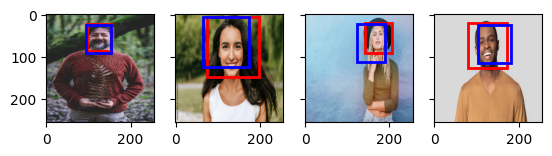

In [229]:
fig, ax = plt.subplots(1, 4, sharex=True, sharey=True)
i = 0

testDir = dir + "test/"
for testFile in os.listdir(testDir):
    if testFile[-4:] != ".jpg": 
        continue
    testImg = cv2.imread(testDir + testFile)

    w_scale = 256 / testImg.shape[1]
    h_scale = 256 / testImg.shape[0]

    testImg = cv2.cvtColor(testImg, cv2.COLOR_BGR2RGB)
    testImg = cv2.resize(testImg, (256, 256))

    coords = model.predict(np.array([testImg]))[0]

    x1 = int(data[testFile][0] * w_scale)
    y1 = int(data[testFile][1] * h_scale)
    w_img = int(data[testFile][2] * w_scale) - x1
    h_img = int(data[testFile][3] * h_scale) - y1

    ax[i].imshow(testImg)
    ax[i].add_patch(plt.Rectangle(xy = (x1, y1), width = w_img,
                                                height = h_img, fill = False, 
                                                color = "red", linewidth = 2))

    ax[i].add_patch(plt.Rectangle(xy = (coords[0], coords[1]), width = coords[2],
                                                height = coords[3], fill = False, 
                                                color = "blue", linewidth = 2))
    i += 1
